In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=si---------si-tso-0001exitdistribution,si---------si-tso-0001exittransmissionhr---------,si---------si-tso-0001exittransmissionat---------,si---------si-tso-0001entrytransmissionat---------,si---------si-tso-0001entrytransmissionhr---------,si---------si-tso-0001entrytransmissionit---------,si---------si-tso-0001exittransmissionit---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesSISI---------SI-TSO-0001entryTransm...        1   Aggregates   
1    1AggregatesSISI---------SI-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesSISI---------SI-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesSISI---------SI-TSO-0001exitDistrib...        1   Aggregates   
4    1AggregatesSISI---------SI-TSO-0001exitTransmi...        1   Aggregates   
..                                                 ...      ...          ...   
212  1AggregatesSISI---------SI-TSO-0001entryTransm...        1   Aggregates   
213  1AggregatesSISI---------SI-TSO-0001exitDistrib...        1   Aggregates   
214  1AggregatesSISI---------SI-TSO-0001exitTransmi...        1   Aggregates   
215  1AggregatesSISI---------SI-TSO-0001exitTransmi...        1   Aggregates   
216  1AggregatesSISI---------SI-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day     value
0          entry    2  42728841
1          entry    2         0
2          entry    2   1220425
3           exit    2  39182672
4           exit    2         0
..           ...  ...       ...
212        entry    1         0
213         exit    1  28810953
214         exit    1         0
215         exit    1   7685647
216         exit    1         0

[217 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         1.236562e+07
    exit          9.124150e+06
2   entry         1.464976e+07
    exit          1.133776e+07
3   entry         1.630510e+07
...                        ...
29  exit          9.443966e+06
30  entry         1.511553e+07
    exit          1.138286e+07
31  entry         2.026515e+07
    exit          1.509620e+07

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

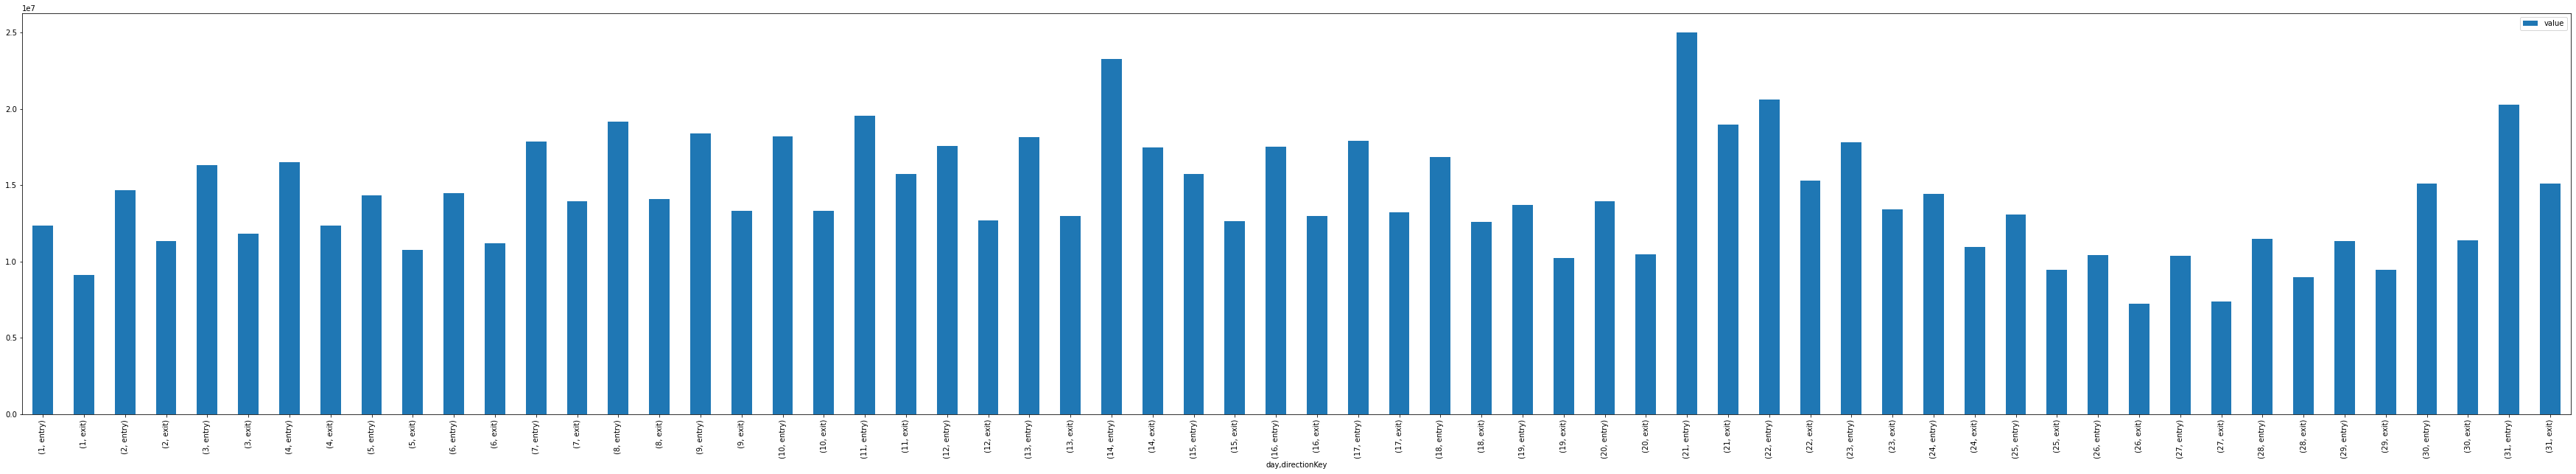

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))